# Классификация изображений рукописных цифр MNIST
### Наивный байесовый классификатор
* Подключим необходимые библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
%matplotlib inline

* Загрузим содержимое MNIST

In [2]:
mnist = fetch_openml(name='mnist_784')

* Извлеченным данные изображений и их ярлыков

In [3]:
X = mnist['data']
Y = mnist['target']

* Функция отображения изображений

In [4]:
def plot_images(images,labels):
    n_cols = min(5,len(images))
    n_rows = len(images) // n_cols
    fig = plt.figure(figsize=(8,8))
    
    for i in range(n_rows*n_cols):
        sp = fig.add_subplot(n_rows,n_cols,i+1)
        plt.axis("off")
        plt.imshow(images[i],cmap=plt.cm.gray)
        sp.set_title(labels[i])
    plt.show()

* Функция отображения матрицы ошибок

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Истинные значения')
    plt.xlabel('Предсказанные значения')
    plt.tight_layout()

* Отобразим 20 изображений из исходной выборки

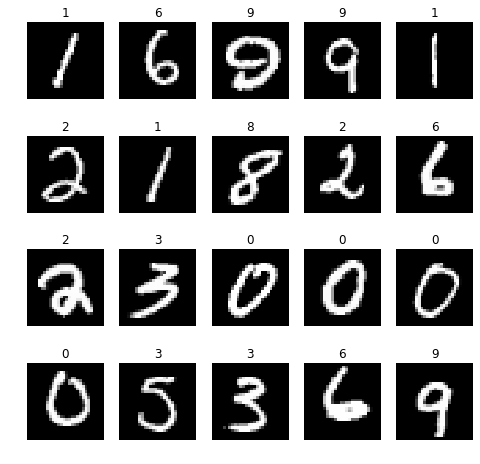

In [6]:
p = np.random.permutation(len(X))
p = p[:20]
plot_images(X[p].reshape(-1,28,28),Y[p])

* Нормализуем данные

In [7]:
Y = Y.astype("int32")
X = X / 255.0

* Разобъем исходную выборку на тренировочную и тестовую

In [8]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X,Y)
train_X.shape, test_X.shape

((52500, 784), (17500, 784))

* Подключим библиотеку классификатора и объявим его

In [68]:
from sklearn.naive_bayes import GaussianNB
cls = GaussianNB()
cls.fit(train_X, train_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

* Просмотрим точность классификации

In [69]:
cls.score(test_X,test_Y)

0.5629714285714286

* Импортируем библиотеку для просмотра отчетов

In [11]:
from sklearn.metrics import classification_report
predictions = cls.predict(test_X)
print(classification_report(test_Y,predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1705
           1       0.87      0.93      0.90      1963
           2       0.88      0.82      0.85      1779
           3       0.81      0.81      0.81      1857
           4       0.81      0.73      0.77      1659
           5       0.86      0.67      0.75      1579
           6       0.88      0.91      0.89      1730
           7       0.95      0.81      0.87      1809
           8       0.64      0.78      0.70      1658
           9       0.68      0.81      0.74      1761

   micro avg       0.82      0.82      0.82     17500
   macro avg       0.83      0.82      0.82     17500
weighted avg       0.83      0.82      0.82     17500



как видим, хуже всего классифицируется цифра 8 и 9

* Отобразим результат классификации

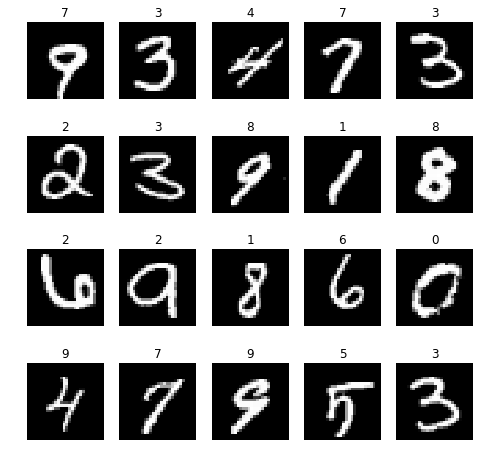

In [12]:
p = np.random.permutation(len(test_X))
p = p[:20]
plot_images(test_X[p].reshape(-1,28,28),predictions[p])

* Матрица расстояний

In [13]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_Y, predictions)
np.set_printoptions(precision=2)

In [14]:
import itertools
class_names = ['Ноль','Один','Два','Три','Четыре','Пять','Шесть','Семь','Восемь','Девять']

Confusion matrix, without normalization
[[1546    2   10    4    2   21   32    0   86    2]
 [   0 1830   14   16    2    4   10    0   81    6]
 [  29   26 1459   43   16    3   84   13  101    5]
 [   9   35   76 1513    7   41   19   13   88   56]
 [   3    8   11    0 1211    1   31    4   75  315]
 [  56   18    9  175   33 1059   32    1  131   65]
 [  21   37   23    0    6   42 1572    0   28    1]
 [  14   32   13    6   55    0    0 1469   61  159]
 [   7   92   37   93   20   54   10    4 1291   50]
 [   9   16    7   28  149    7    0   48   78 1419]]


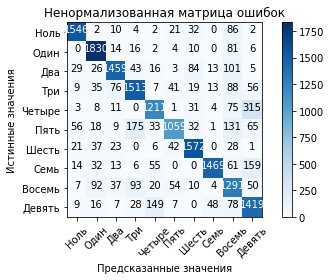

In [15]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Ненормализованная матрица ошибок')

Normalized confusion matrix
[[9.07e-01 1.17e-03 5.87e-03 2.35e-03 1.17e-03 1.23e-02 1.88e-02 0.00e+00
  5.04e-02 1.17e-03]
 [0.00e+00 9.32e-01 7.13e-03 8.15e-03 1.02e-03 2.04e-03 5.09e-03 0.00e+00
  4.13e-02 3.06e-03]
 [1.63e-02 1.46e-02 8.20e-01 2.42e-02 8.99e-03 1.69e-03 4.72e-02 7.31e-03
  5.68e-02 2.81e-03]
 [4.85e-03 1.88e-02 4.09e-02 8.15e-01 3.77e-03 2.21e-02 1.02e-02 7.00e-03
  4.74e-02 3.02e-02]
 [1.81e-03 4.82e-03 6.63e-03 0.00e+00 7.30e-01 6.03e-04 1.87e-02 2.41e-03
  4.52e-02 1.90e-01]
 [3.55e-02 1.14e-02 5.70e-03 1.11e-01 2.09e-02 6.71e-01 2.03e-02 6.33e-04
  8.30e-02 4.12e-02]
 [1.21e-02 2.14e-02 1.33e-02 0.00e+00 3.47e-03 2.43e-02 9.09e-01 0.00e+00
  1.62e-02 5.78e-04]
 [7.74e-03 1.77e-02 7.19e-03 3.32e-03 3.04e-02 0.00e+00 0.00e+00 8.12e-01
  3.37e-02 8.79e-02]
 [4.22e-03 5.55e-02 2.23e-02 5.61e-02 1.21e-02 3.26e-02 6.03e-03 2.41e-03
  7.79e-01 3.02e-02]
 [5.11e-03 9.09e-03 3.98e-03 1.59e-02 8.46e-02 3.98e-03 0.00e+00 2.73e-02
  4.43e-02 8.06e-01]]


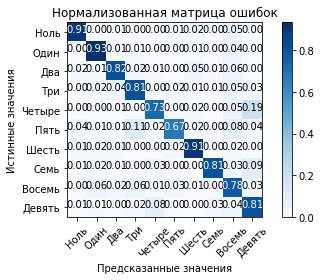

In [16]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Нормализованная матрица ошибок')

### KNN классификатор

* Подключим библиотеку классификатора kNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

* Создадим классификатор и обучим его

In [18]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(train_X, train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

* Предскажем значения на картинках

In [20]:
predictions = model.predict(test_X)
print(classification_report(test_Y,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1705
           1       0.95      1.00      0.97      1963
           2       0.98      0.97      0.97      1779
           3       0.94      0.98      0.96      1857
           4       0.95      0.98      0.97      1659
           5       0.96      0.95      0.96      1579
           6       0.99      0.98      0.99      1730
           7       0.96      0.97      0.97      1809
           8       0.99      0.90      0.94      1658
           9       0.98      0.92      0.95      1761

   micro avg       0.97      0.97      0.97     17500
   macro avg       0.97      0.96      0.96     17500
weighted avg       0.97      0.97      0.97     17500



* Визуализируем результат классификации 20-и картинок

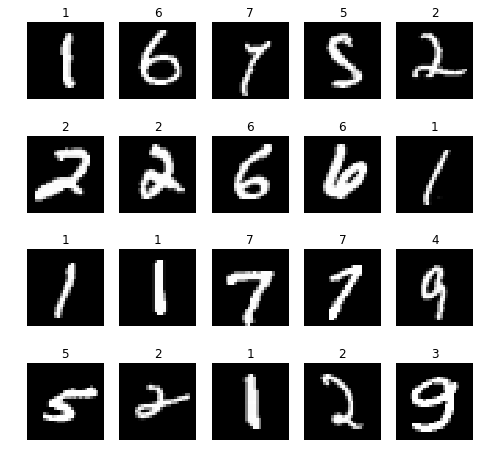

In [22]:
p = np.random.permutation(len(test_X))
p = p[:20]
plot_images(test_X[p].reshape(-1,28,28),predictions[p])

* Расчитаем матрицу ошибок

In [23]:
cnf_matrix = confusion_matrix(test_Y, predictions)
np.set_printoptions(precision=2)

* Визуализируем матрицу ошибок

Confusion matrix, without normalization
[[1700    2    0    0    0    0    2    0    1    0]
 [   1 1958    2    0    0    0    0    2    0    0]
 [  18   18 1721    6    2    0    0   11    3    0]
 [   2    7   14 1817    0    9    0    4    3    1]
 [   0   15    1    0 1628    0    3    3    1    8]
 [   6    3    0   44    4 1505    7    2    2    6]
 [  14    3    1    1    2    8 1701    0    0    0]
 [   4   19    8    3    8    0    0 1760    0    7]
 [  13   22   12   41   14   41    7   10 1487   11]
 [   6    7    2   18   55    8    0   45    5 1615]]


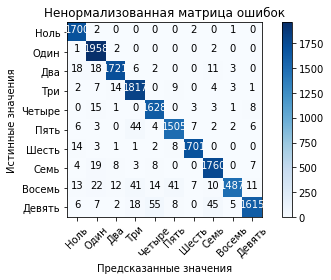

In [24]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Ненормализованная матрица ошибок')

### Метод главных компонент

* Подключим библиотеку и создадим объект PCA с количеством компонент 2

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_X)
print(pca.explained_variance_ratio_)

* Результат PCA

In [37]:
print(train_X.shape)
print(pca_result.shape)

(52500, 784)
(52500, 2)


* Визуализируем изображения

(52500, 49)


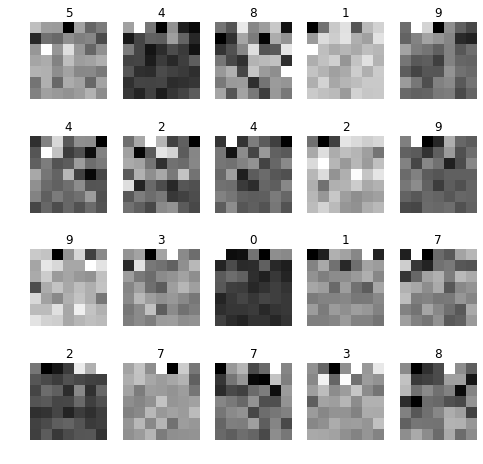

In [61]:
pca = PCA(n_components=49)
X_train_transformed = pca.fit_transform(train_X)
print(X_train_transformed.shape)
p = np.random.permutation(len(X_train_transformed))
p = p[:20]
plot_images(X_train_transformed[p].reshape(-1,7,7),train_Y[p])

* Изменим количество компонент до 50

In [ ]:
pca = PCA(n_components=50)
X_train_transformed = pca.fit_transform(train_X)

* Главные компоненты

In [65]:
print(pca.explained_variance_)

[5.15 3.79 3.24 2.84 2.57 2.26 1.74 1.52 1.46 1.24 1.11 1.08 0.9  0.9
 0.84 0.78 0.69 0.68 0.63 0.61 0.56 0.53 0.51 0.48 0.46 0.44 0.43 0.41
 0.39 0.36 0.35 0.34 0.32 0.31 0.3  0.29 0.27 0.26 0.25 0.25 0.24 0.23
 0.22 0.21 0.2  0.2  0.19 0.18 0.18 0.17]


* Ковариационная матрица

In [66]:
print(pca.get_covariance())

[[1.25e-02 1.70e-32 3.71e-32 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.70e-32 1.25e-02 4.84e-32 ... 0.00e+00 0.00e+00 0.00e+00]
 [3.71e-32 4.84e-32 1.25e-02 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [0.00e+00 0.00e+00 0.00e+00 ... 1.25e-02 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 ... 0.00e+00 1.25e-02 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 ... 0.00e+00 0.00e+00 1.25e-02]]


* Разделим выборку на обучающую и тестовую

In [47]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split( 
    X_train_transformed, train_Y, test_size=0.2, random_state=13)

* Подготовим данные для анализа зависимости качества классификации от количества компонент и количества соседей

In [48]:
components = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
neighbors = [1, 2, 3, 4, 5, 6, 7]

scores = np.zeros( (components[len(components)-1]+1, neighbors[len(neighbors)-1]+1 ) )

* Проведем анализ зависимости для классификатора kNN

In [49]:
for component in components:
    for n in neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train_pca[:,:component], y_train_pca)
        score = knn.score(X_test_pca[:,:component], y_test_pca)
        
        scores[component][n] = score
        
        print('Components = ', component, ', neighbors = ', n,', Score = ', score)

Components =  5 , neighbors =  1 , Score =  0.6966666666666667
Components =  5 , neighbors =  2 , Score =  0.6859047619047619
Components =  5 , neighbors =  3 , Score =  0.719047619047619
Components =  5 , neighbors =  4 , Score =  0.7240952380952381
Components =  5 , neighbors =  5 , Score =  0.7349523809523809
Components =  5 , neighbors =  6 , Score =  0.7391428571428571
Components =  5 , neighbors =  7 , Score =  0.7448571428571429
Components =  10 , neighbors =  1 , Score =  0.9131428571428571
Components =  10 , neighbors =  2 , Score =  0.9085714285714286
Components =  10 , neighbors =  3 , Score =  0.9241904761904762
Components =  10 , neighbors =  4 , Score =  0.9257142857142857
Components =  10 , neighbors =  5 , Score =  0.9280952380952381
Components =  10 , neighbors =  6 , Score =  0.9272380952380952
Components =  10 , neighbors =  7 , Score =  0.9284761904761905
Components =  15 , neighbors =  1 , Score =  0.9536190476190476
Components =  15 , neighbors =  2 , Score =  0.9

* Визуализируем результат

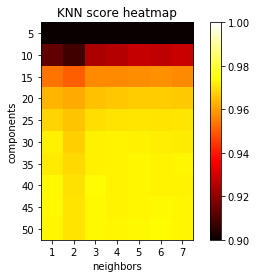

In [50]:
scores = np.reshape(scores[scores != 0], (len(components), len(neighbors)))

x = [0, 1, 2, 3, 4, 5, 6]
y = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

plt.rcParams["axes.grid"] = False

fig, ax = plt.subplots()
plt.imshow(scores, cmap='hot', interpolation='none', vmin=.90, vmax=1)
plt.xlabel('neighbors')
plt.ylabel('components')
plt.xticks(x, neighbors)
plt.yticks(y, components)
plt.title('KNN score heatmap')

plt.colorbar()
plt.show()

* Аналогично для наивного байесовского классификатора

* Подготовим данные

In [103]:
components = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

scores = np.zeros( len(components) )

* Проведем анализ зависимости точности от количества компонент

In [104]:
for i in range(0, len(components)):
    mnb = GaussianNB()
    mnb.fit(X_train_pca[:,:components[i]], y_train_pca)
    score = mnb.score(X_test_pca[:,:components[i]], y_test_pca)
    scores[i] = score     
    print('Количество компонент = ', components[i],', Точность = ', score)

Количество компонент =  5 , Точность =  0.6451428571428571
Количество компонент =  10 , Точность =  0.7693333333333333
Количество компонент =  15 , Точность =  0.8085714285714286
Количество компонент =  20 , Точность =  0.84
Количество компонент =  25 , Точность =  0.8535238095238096
Количество компонент =  30 , Точность =  0.8561904761904762
Количество компонент =  35 , Точность =  0.8606666666666667
Количество компонент =  40 , Точность =  0.8644761904761905
Количество компонент =  45 , Точность =  0.8668571428571429
Количество компонент =  50 , Точность =  0.8669523809523809


* Визуализируем результат

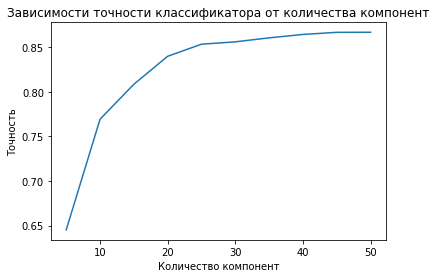

In [111]:
plt.plot(components,scores)
plt.xlabel('Количество компонент')
plt.ylabel('Точность')
plt.title('Зависимости точности классификатора от количества компонент')
plt.show()

### Линейный дискриминантный анализ

* Подключим библиотеки и создадим анализатор

In [126]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=10)
X_train_transformed_lda = lda.fit(train_X, train_Y).transform(train_X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


* Подготовим данные

In [127]:
components = [1,2,3,4,5,6,7,8,9,10]
scores = np.zeros( len(components) )
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split( 
    X_train_transformed_lda, train_Y, test_size=0.2, random_state=13)

* Проведем анализ зависимости точности классификатора от количесвта компонент

In [132]:
for i in range(0, len(components)):
    mnb = GaussianNB()
    mnb.fit(X_train_lda[:,:components[i]], y_train_lda)
    score = mnb.score(X_test_lda[:,:components[i]], y_test_lda)
    scores[i] = score     
    print('Количество компонент = ', components[i],', Точность = ', score)

Количество компонент =  1 , Точность =  0.4175238095238095
Количество компонент =  2 , Точность =  0.5604761904761905
Количество компонент =  3 , Точность =  0.7416190476190476
Количество компонент =  4 , Точность =  0.8125714285714286
Количество компонент =  5 , Точность =  0.8255238095238095
Количество компонент =  6 , Точность =  0.8367619047619047
Количество компонент =  7 , Точность =  0.8591428571428571
Количество компонент =  8 , Точность =  0.8766666666666667
Количество компонент =  9 , Точность =  0.8807619047619047
Количество компонент =  10 , Точность =  0.8807619047619047


* Визуализируем результат

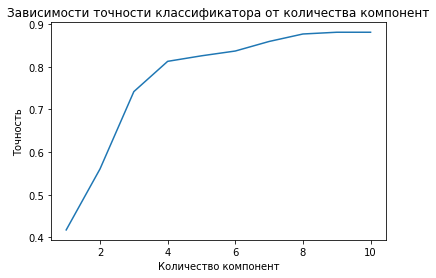

In [133]:
plt.plot(components,scores)
plt.xlabel('Количество компонент')
plt.ylabel('Точность')
plt.title('Зависимости точности классификатора от количества компонент')
plt.show()

In [139]:
lda = LinearDiscriminantAnalysis(n_components=20)
X_train_transformed_lda_after_pca = lda.fit(X_train_transformed, train_Y).transform(X_train_transformed)

In [140]:
components = [1,2,3,4,5,6,7,8,9,10,15,20]
scores = np.zeros( len(components) )
X_train_pca_lda, X_test_pca_lda, y_train_pca_lda, y_test_pca_lda = train_test_split( 
    X_train_transformed_lda_after_pca, train_Y, test_size=0.2, random_state=13)

In [141]:
for i in range(0, len(components)):
    mnb = GaussianNB()
    mnb.fit(X_train_pca_lda[:,:components[i]], y_train_pca_lda)
    score = mnb.score(X_test_pca_lda[:,:components[i]], y_test_pca_lda)
    scores[i] = score     
    print('Количество компонент = ', components[i],', Точность = ', score)

Количество компонент =  1 , Точность =  0.32876190476190476
Количество компонент =  2 , Точность =  0.4997142857142857
Количество компонент =  3 , Точность =  0.7406666666666667
Количество компонент =  4 , Точность =  0.7960952380952381
Количество компонент =  5 , Точность =  0.812
Количество компонент =  6 , Точность =  0.8455238095238096
Количество компонент =  7 , Точность =  0.8516190476190476
Количество компонент =  8 , Точность =  0.87
Количество компонент =  9 , Точность =  0.8735238095238095
Количество компонент =  10 , Точность =  0.8735238095238095
Количество компонент =  15 , Точность =  0.8735238095238095
Количество компонент =  20 , Точность =  0.8735238095238095


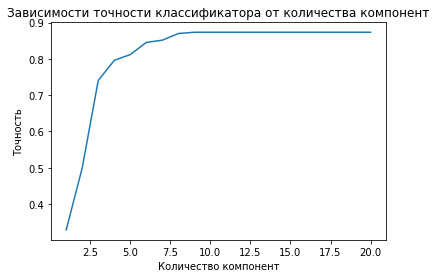

In [142]:
plt.plot(components,scores)
plt.xlabel('Количество компонент')
plt.ylabel('Точность')
plt.title('Зависимости точности классификатора от количества компонент')
plt.show()